In [1]:
using Pkg
using LinearAlgebra
using Plots
using Distributions
using Random
using StateSpaceDynamics
using StatsBase

const SSD = StateSpaceDynamics

StateSpaceDynamics

In [5]:
n=10000
true_labels, data = SSD.sample(true_model, n=n)

MethodError: MethodError: no method matching emission_sample(::GaussianEmission; observation_sequence::Matrix{Float64})

Closest candidates are:
  emission_sample(::GaussianEmission; n) got unsupported keyword argument "observation_sequence"
   @ StateSpaceDynamics c:\Users\zachl\OneDrive\Documents\GitHub\StateSpaceDynamics.jl\src\EmissionModels.jl:105
  emission_sample(!Matched::StateSpaceDynamics.CompositeModelEmission, !Matched::Vector; observation_sequence)
   @ StateSpaceDynamics c:\Users\zachl\OneDrive\Documents\GitHub\StateSpaceDynamics.jl\src\EmissionModels.jl:854
  emission_sample(!Matched::AutoRegressionEmission, !Matched::Matrix{<:Real}; observation_sequence)
   @ StateSpaceDynamics c:\Users\zachl\OneDrive\Documents\GitHub\StateSpaceDynamics.jl\src\EmissionModels.jl:702
  ...


# Gaussian HMM

In [2]:
"""
Create an underlying GaussianHMM to generate data
"""

# Create Guassian Emission Models
output_dim = 2
μ = [0.0, 0.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)
emission_1 = GaussianEmission(output_dim, μ, Σ)

μ = [2.0, 1.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)
emission_2 = GaussianEmission(output_dim, μ, Σ)

# Create GaussianHMM
true_model = SSD.GaussianHMM(K=2, output_dim=2)
true_model.B[1] = emission_1
true_model.B[2] = emission_2
true_model.A = [0.9 0.1; 0.8 0.2]

# Sample from the model
n=10000
true_labels, data = SSD.sample(true_model, n=n)


# Fit a gaussian hmm to the data
test_model = SSD.GaussianHMM(K=2, output_dim=2)
ll = SSD.fit!(test_model, data)

print(isapprox(test_model.B[1].μ, true_model.B[1].μ, atol=0.1) || isapprox(test_model.B[1].μ, true_model.B[2].μ, atol=0.1))
print(isapprox(test_model.B[2].μ, true_model.B[2].μ, atol=0.1) || isapprox(test_model.B[2].μ, true_model.B[1].μ, atol=0.1))

MethodError: MethodError: no method matching emission_sample(::GaussianEmission; observation_sequence::Matrix{Float64})

Closest candidates are:
  emission_sample(::GaussianEmission; n) got unsupported keyword argument "observation_sequence"
   @ StateSpaceDynamics c:\Users\zachl\OneDrive\Documents\GitHub\StateSpaceDynamics.jl\src\EmissionModels.jl:105
  emission_sample(!Matched::StateSpaceDynamics.CompositeModelEmission, !Matched::Vector; observation_sequence)
   @ StateSpaceDynamics c:\Users\zachl\OneDrive\Documents\GitHub\StateSpaceDynamics.jl\src\EmissionModels.jl:854
  emission_sample(!Matched::AutoRegressionEmission, !Matched::Matrix{<:Real}; observation_sequence)
   @ StateSpaceDynamics c:\Users\zachl\OneDrive\Documents\GitHub\StateSpaceDynamics.jl\src\EmissionModels.jl:702
  ...


# Switching Bernoulli Regression

In [6]:
"""
Create Bernoulli Regression Model
"""
# Make Emission Models
emission_1 = SSD.BernoulliRegressionEmission(input_dim=2, include_intercept=true, β = [3, 1, 8])
emission_2 = SSD.BernoulliRegressionEmission(input_dim=2, include_intercept=true, β = [-4, -5, 0.1])

# Create Switching Bernoulli Regression and add the emissions
true_model = SSD.SwitchingBernoulliRegression(K=2, input_dim=2)
true_model.B[1] = emission_1
true_model.B[2] = emission_2

# Sample from the model
n=50000
Φ = randn(n, 2)
true_labels, data = SSD.sample(true_model, Φ, n=n)

# Fit a new Bernoulli Regression Model to the data
test_model = SSD.SwitchingBernoulliRegression(K=2, input_dim=2)
ll = SSD.fit!(test_model, data, Φ)

# Test it works alright
print(isapprox(test_model.B[1].β, true_model.B[1].β, atol=0.5) || isapprox(test_model.B[1].β, true_model.B[2].β, atol=0.5))
print(isapprox(test_model.B[2].β, true_model.B[2].β, atol=0.5) || isapprox(test_model.B[2].β, true_model.B[1].β, atol=0.5))

New Function in use...


Running EM algorithm...   5%|██                          |  ETA: 0:00:19

Running EM algorithm...   9%|███                         |  ETA: 0:00:21

Running EM algorithm...  13%|████                        |  ETA: 0:00:25

Running EM algorithm...  16%|█████                       |  ETA: 0:00:26

Running EM algorithm...  19%|██████                      |  ETA: 0:00:27

Running EM algorithm...  21%|██████                      |  ETA: 0:00:29

Running EM algorithm...  23%|███████                     |  ETA: 0:00:30

Running EM algorithm...  26%|████████                    |  ETA: 0:00:30

Running EM algorithm...  28%|████████                    |  ETA: 0:00:32

Running EM algorithm...  30%|█████████                   |  ETA: 0:00:32

Running EM algorithm...  32%|█████████                   |  ETA: 0:00:32

Running EM algorithm...  34%|██████████                  |  ETA: 0:00:31

Running EM algorithm...  36%|███████████                 |  ETA: 0:00:31

Running EM algorithm...  38%|█████████

truefalse

In [7]:
println(test_model.B[1])
println(test_model.B[2])

BernoulliRegressionEmission(2, [-4.141221823778882, -5.265402631603095, -0.04267083485481099], true, 0.0)
BernoulliRegressionEmission(2, [2.5456938170035426, 0.7906500125721305, 7.156033533757789], true, 0.0)


# Switching Poisson Regression

In [3]:
"""
Create a new GaussianHMM and try to fit the synthetic data
"""
n = 10  # Number of samples per trial

num_trials = 3  # Number of trials
trial_inputs = Vector{Matrix{Float64}}(undef, num_trials)  # Vector to store data matrices
trial_labels = Vector{Vector{Int}}(undef, num_trials)  # Vector to store label vectors
trial_outputs = Vector{Matrix{Float64}}(undef, num_trials)

for i in 1:num_trials
    true_labels, data = SSD.sample(true_model, n=n)  # Generate data and labels
    trial_labels[i] = true_labels  # Store labels for the ith trial
    trial_inputs[i] = data  # Store data matrix for the ith trial

    true_labels, data = SSD.sample(true_model, n=n)  # Generate data and labels
    trial_outputs[i] = data  # Store data matrix for the ith trial
end

In [4]:
"""
Generate a multiple trial GaussianHMM Dataset from the fit model
"""
model2 =SSD.GaussianHMM(K=2, output_dim=2)
ll = SSD.fit!(model2, trial_inputs)

Using new GLM function


10-element Vector{Float64}:
 -Inf
 -76.70029012455825
 -47.307492824986895
 -43.514949067844746
 -38.92260983372855
 -34.522308805041895
 -30.66150287103459
 -23.450713121590514
 -21.715453196834286
 -21.71545319564074

In [10]:
model3 = SSD.SwitchingGaussianRegression(K=2, input_dim=2, output_dim=2)
ll2 = SSD.fit!(model3, trial_outputs, trial_inputs, max_iters=100)

Using new GLM function


15-element Vector{Float64}:
 -Inf
 -94.84854542844941
 -70.29312384633938
 -55.303469591772135
 -52.810127324022965
 -54.79990420340076
 -54.12247048567283
 -49.315367231017845
 -46.526669175044375
 -49.651329530657605
 -35.09126121833138
  28.800189223643617
 -13.233591564231688
 -13.233716929664451
 -13.233716938137356

In [11]:

# Function to sample from initial state and transition matrix
function sample_states(num_samples, initial_probs, transition_matrix)
    states = Vector{Int}(undef, num_samples)
    states[1] = rand(Categorical(initial_probs))  # Initial state
    for i in 2:num_samples
        states[i] = rand(Categorical(transition_matrix[states[i - 1], :]))  # State transitions
    end
    return states
end


# Create a true underlying model
model = SSD.SwitchingGaussianRegression(K=2, input_dim=1, output_dim=1)
model.B[1].β = [100; 100;;]
model.B[2].β = [-100; -100;;]
model.B[1].Σ = [2.0;;]
model.B[2].Σ = [3.0;;]

# Define initial state probabilities (π) and transition matrix (A)
initial_probs = [0.6, 0.4]  # Probability to start in state 1 or state 2
transition_matrix = [0.9 0.1; 0.4 0.6]  # State transition probabilities

n = 100 # Number of samples per trial
num_trials = 50  # Number of trials
n1_std = 10
n2_std = 5

# Vectors to store generated data
trial_inputs = Vector{Matrix{Float64}}(undef, num_trials)
trial_labels = Vector{Vector{Int}}(undef, num_trials)
trial_outputs = Vector{Matrix{Float64}}(undef, num_trials)



# Generate trials
for trial in 1:num_trials
    # Random input data
    x_data = randn(n, 1)  # Random input data for this trial
    trial_inputs[trial] = x_data

    # Generate state sequence
    state_sequence = sample_states(n, initial_probs, transition_matrix)
    trial_labels[trial] = state_sequence

    # Generate output data based on state and linear relationships
    y_data = zeros(n, 1)
    for i in 1:n
        if state_sequence[i] == 1
            y_data[i] = (model.B[1].β[2] * x_data[i] + model.B[1].β[1]) + (randn() * n1_std)
        else
            y_data[i] = (model.B[2].β[2] * x_data[i] + model.B[2].β[1]) + (randn() * n2_std)
        end
    end
    trial_outputs[trial] = y_data
end

# Create new model and fit the data
est_model = SSD.SwitchingGaussianRegression(K=2, input_dim=1, output_dim=1)
ll = SSD.fit!(est_model, trial_inputs, trial_outputs, max_iters=200)

# Run tests to assess model fit
print(isapprox(est_model.B[1].β, model.B[1].β, atol=0.1) || isapprox(est_model.B[1].β, model.B[2].β, atol=0.1))
print(isapprox(est_model.B[2].β, model.B[2].β, atol=0.1) || isapprox(est_model.B[2].β, model.B[1].β, atol=0.1))
print(isapprox(est_model.B[1].Σ, model.B[1].Σ, atol=0.01) || isapprox(est_model.B[1].Σ, model.B[2].Σ, atol=0.01))
print(isapprox(est_model.B[2].Σ, model.B[2].Σ, atol=0.01) || isapprox(est_model.B[2].Σ, model.B[1].Σ, atol=0.01))




Using new GLM function
falsefalsefalsefalse

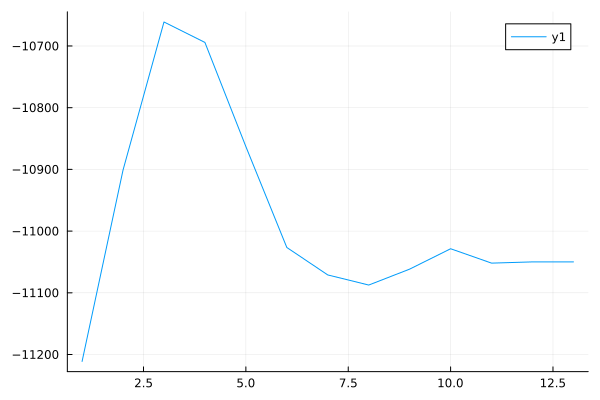

In [12]:
plot(ll[3:end])

In [13]:
println(est_model.B[1].β)
println(est_model.B[2].β)

println(model.B[1].β)
println(model.B[2].β)


println(est_model.B[1].Σ[1])
println(est_model.B[2].Σ[1])

[-0.7601516559611875; 0.008268807122744058;;]
[-0.22355330480039334; 0.003684520938858917;;]
[100; 100;;]
[-100; -100;;]
1.0e-12
0.7743027072228642
